In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Импортирование необходимых модулей и атрибутов
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout

In [2]:
df = pd.read_excel(r"C:\Users\55944\Desktop\888\data_iqr_2.xlsx")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [3]:
columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа','Потребление смолы', 'Угол нашивки',
       'Шаг нашивки', 'Плотность нашивки','Прочность при растяжении, МПа']

In [4]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [5]:
x=df[[ 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки']]
# целевую переменную поместим в переменную y
y=df[['Соотношение матрица-наполнитель']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Построим простую линейную модель 1

In [7]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [8]:
normalizer.adapt(np.array(x))

In [9]:
model_1 = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [10]:
model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [11]:

history = model_1.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 6.4147 - val_loss: 3.1020
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.6597 - val_loss: 1.0174
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8786 - val_loss: 0.9084
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9799 - val_loss: 0.8847
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9054 - val_loss: 0.8644
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8839 - val_loss: 0.9410
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.8897 - val_loss: 0.8923
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8646 - val_loss: 0.8608
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8776 - val_loss: 0.8984
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8819 - val_loss: 0.8693
Epoch 11

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.912142,0.850649,95
96,0.901191,0.890036,96
97,0.886420,1.009759,97
98,0.932240,0.830073,98
99,0.880521,0.961811,99


In [13]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

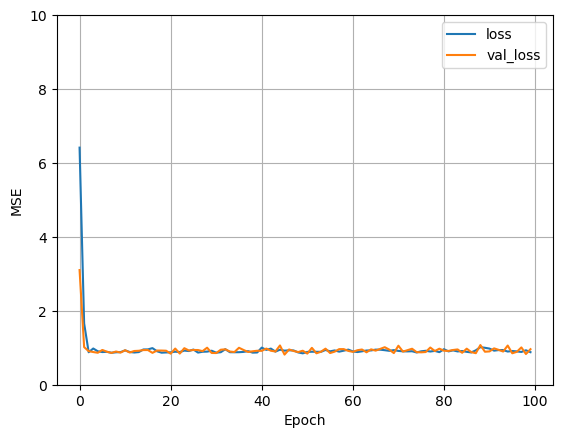

In [14]:
plot_loss(history)

In [15]:
y_pred_model_1 = model_1.predict(x_test)

9/9 [==============================] - 0s 2ms/step


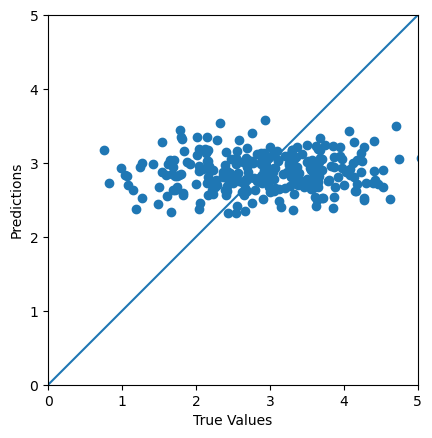

In [16]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model_1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


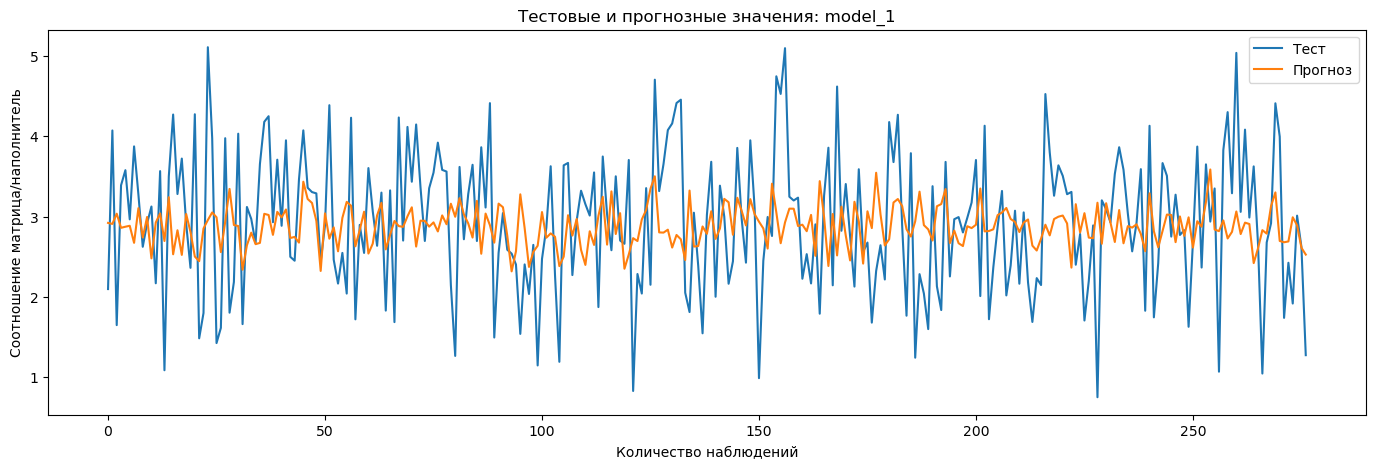

In [17]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model_1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'model_1')

#Зададим функцию для вывода метрик в виде таблицы

In [18]:
def error (model, x_train, x_test, y_train, y_test, name = 'Model name', trg = 'Целевой параметр'):
    mae_test = mean_absolute_error(y_test, model.predict(x_test))
    mse_test = mean_squared_error(y_test, model.predict(x_test))
    mae_train = mean_absolute_error(y_train, model.predict(x_train))
    mse_train = mean_squared_error(y_train, model.predict(x_train))
    R_Squared=  r2_score(y_test, model.predict(x_test))  
    
    df_error = pd.DataFrame({
        'model':[name],
        'Target param':trg,
        'MAE(test)':mae_test,
        'MAE(train)':mae_train,
        'MSE(test)':mse_test,
        'MSE(train)':mse_train,
        'R_Squared': R_Squared
})
    return df_error

In [19]:
df_1 = error(model_1, x_train, x_test, y_train, y_test,
       name = 'model_1', trg = 'Соотношение матрица-наполнитель')
df_1

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_1,Соотношение матрица-наполнитель,0.726626,0.741019,0.799486,0.855903,-0.04582


# Построим простую линейную модель_2 с теми же параметрами, но включим функцию callbacks

In [20]:
# вводим функцию CALLBACKS(остановка обучения когда  целевой показатель перестает улучшаться) 
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, 
                                                     verbose=1, restore_best_weights=True)
def callbacks(pat = 10):
    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=pat, 
                                                     verbose=1, restore_best_weights=True)
    return callback

In [21]:

model_2 = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [22]:
model_2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [23]:
%%time
history = model_2.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)


Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 6.5186 - val_loss: 3.5508
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.6128 - val_loss: 0.9393
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8752 - val_loss: 0.8762
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8928 - val_loss: 0.9032
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8569 - val_loss: 0.8810
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8403 - val_loss: 0.9505
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8981 - val_loss: 0.8664
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8946 - val_loss: 0.8934
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8699 - val_loss: 0.9301
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8620 - val_loss: 0.8847
Epoch 11/

In [24]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

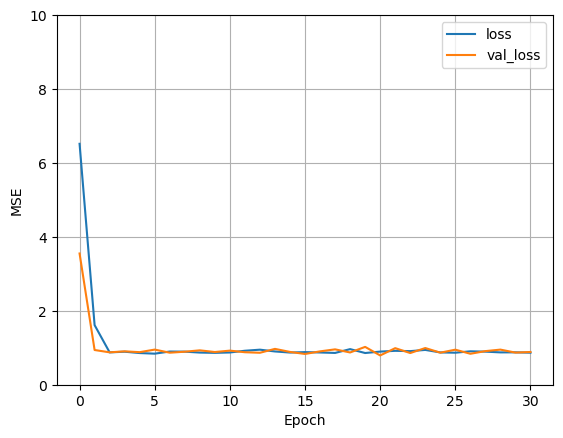

In [25]:
plot_loss(history)

In [26]:
y_pred_model_2 = model_2.predict(x_test)

9/9 [==============================] - 0s 816us/step


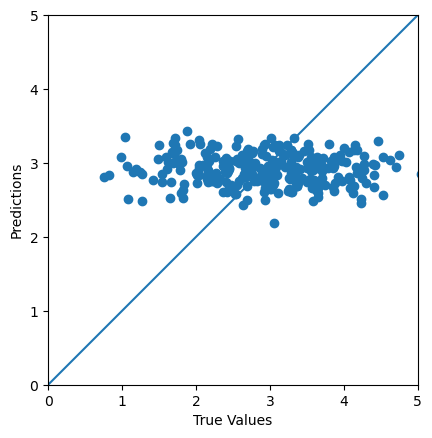

In [27]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model_2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 814us/step


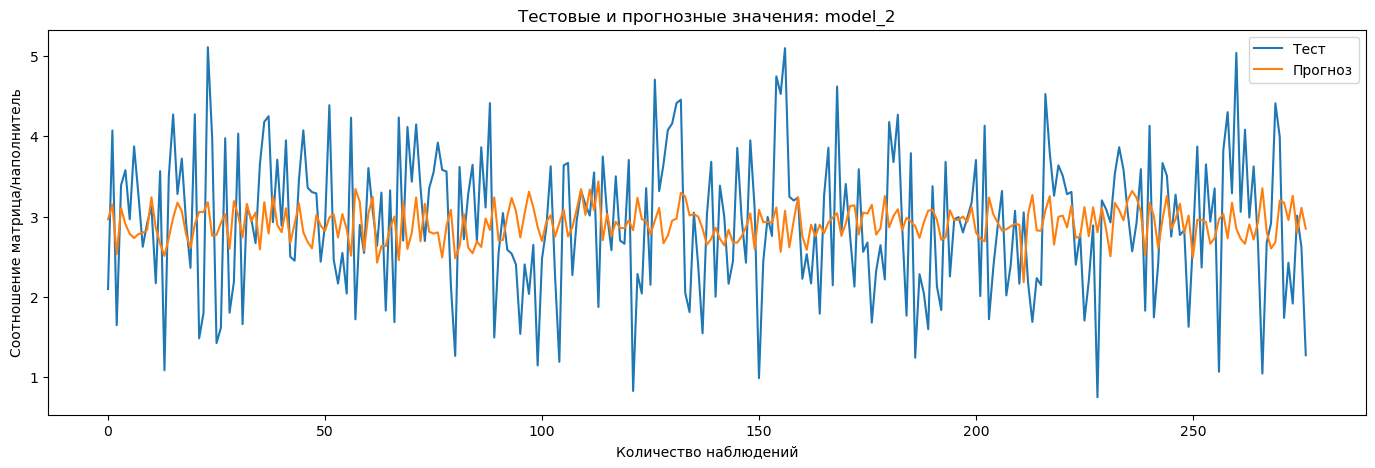

In [28]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model_2.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'model_2')

In [29]:
df_2 = error(model_2, x_train, x_test, y_train, y_test,
       name = 'model_2', trg = 'Соотношение матрица-наполнитель')
df_2

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_2,Соотношение матрица-наполнитель,0.739409,0.730533,0.821657,0.83905,-0.074823


# Построим простую линейную модель с теми же параметрами, но изменим оптимизатор на SGD

In [30]:
model_3 = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [31]:
model_3.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss='mean_squared_error')

In [32]:
%%time
history = model_3.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 2.6785 - val_loss: 1.1184
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8995 - val_loss: 1.0072
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8516 - val_loss: 0.9178
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8776 - val_loss: 0.9139
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8712 - val_loss: 0.9672
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8575 - val_loss: 0.9933
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8574 - val_loss: 1.2139
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8727 - val_loss: 0.9931
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9098 - val_loss: 0.9543
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8498 - val_loss: 0.8944
Epoch 11/

In [33]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

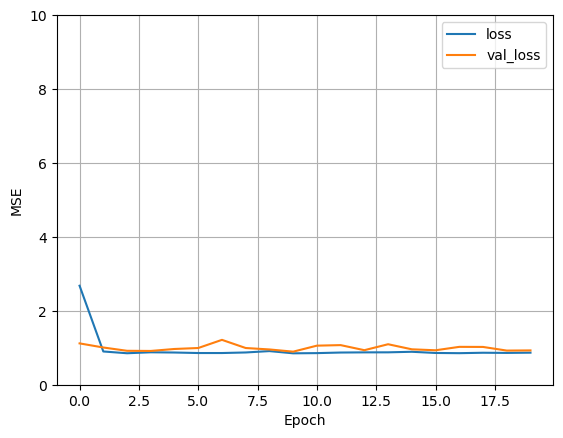

In [34]:
plot_loss(history)

In [35]:
y_pred_model_3 = model_3.predict(x_test)

9/9 [==============================] - 0s 2ms/step


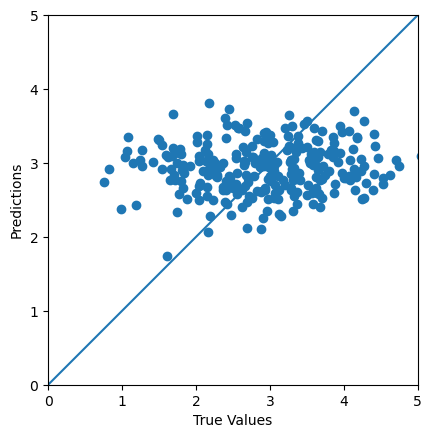

In [36]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model_3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


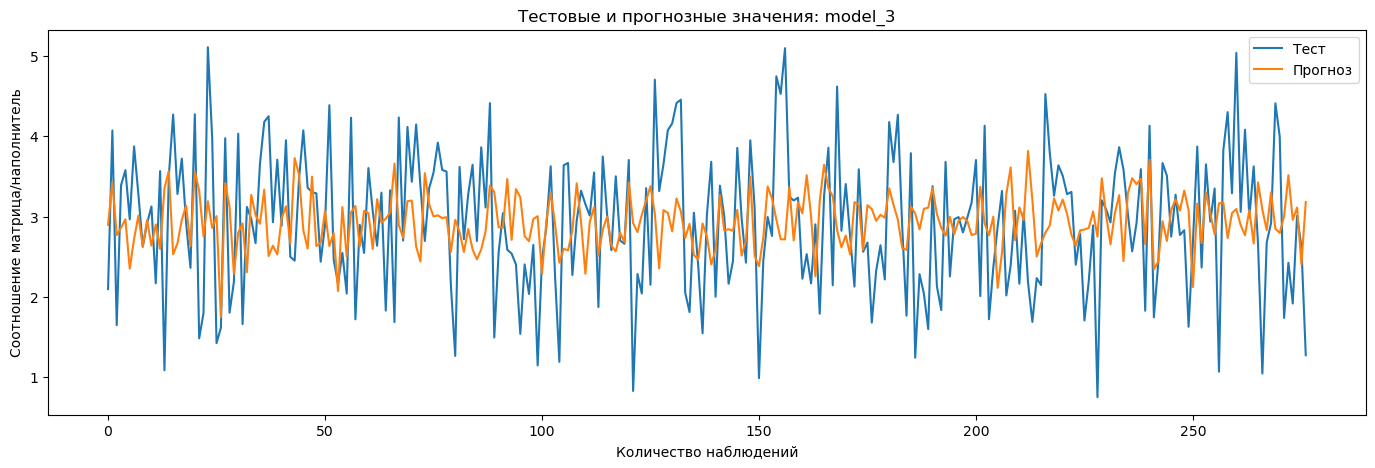

In [37]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model_3.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'model_3')

In [38]:
df_3 = error(model_3, x_train, x_test, y_train, y_test,
       name = 'model_3', trg = 'Соотношение матрица-наполнитель')
df_3

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_3,Соотношение матрица-наполнитель,0.736534,0.761226,0.833415,0.89189,-0.090203


# Построим простую линейную модель с теми же параметрами, но изменим оптимизатор на RMSprop

In [39]:
model_4 = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [40]:
model_4.compile(
    optimizer=tf.optimizers.RMSprop(learning_rate=0.01),
    loss='mean_squared_error')

In [41]:
%%time
history = model_4.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 9.7809 - val_loss: 8.5149
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 8.2485 - val_loss: 7.4575
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 7.0950 - val_loss: 6.5593
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 6.1436 - val_loss: 5.8492
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 5.3081 - val_loss: 5.1760
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 4.5837 - val_loss: 4.5911
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 3.9721 - val_loss: 4.0426
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 3.4103 - val_loss: 3.4989
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 2.9173 - val_loss: 3.0232
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 2.4840 - val_loss: 2.5983
Epoch 11/

In [42]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

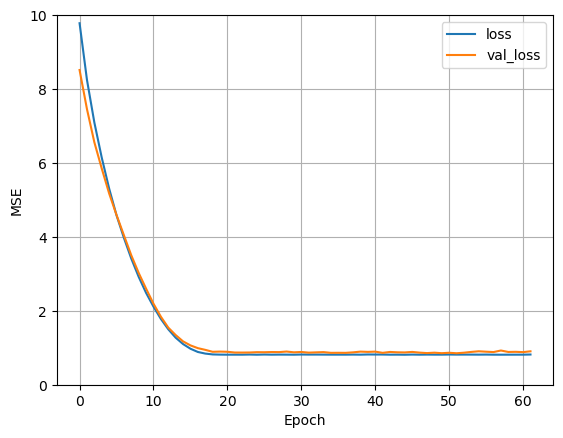

In [43]:
plot_loss(history)

In [44]:
y_pred_model_4 = model_4.predict(x_test)

9/9 [==============================] - 0s 2ms/step


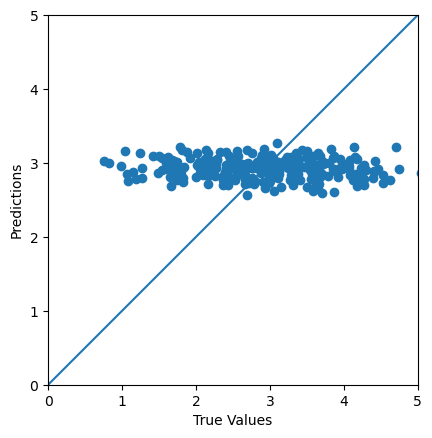

In [45]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model_4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


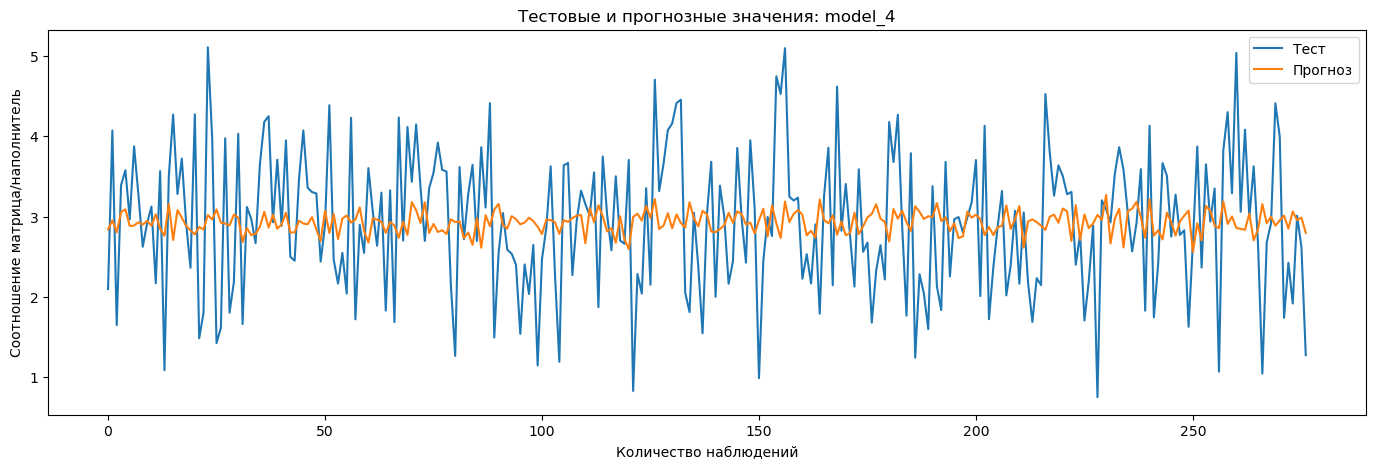

In [46]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model_4.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'model_4')

In [47]:
df_4 = error(model_4, x_train, x_test, y_train, y_test,
       name = 'model_4', trg = 'Соотношение матрица-наполнитель')
df_4

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_4,Соотношение матрица-наполнитель,0.728231,0.720052,0.801538,0.81338,-0.048504


In [48]:
df_result = pd.concat([df_1, df_2, df_3, df_4], axis=0).reset_index(drop = True)
df_result

,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_1,Соотношение матрица-наполнитель,0.726626,0.741019,0.799486,0.855903,-0.045820
1,model_2,Соотношение матрица-наполнитель,0.739409,0.730533,0.821657,0.839050,-0.074823
2,model_3,Соотношение матрица-наполнитель,0.736534,0.761226,0.833415,0.891890,-0.090203
3,model_4,Соотношение матрица-наполнитель,0.728231,0.720052,0.801538,0.813380,-0.048504


# Построение многослойного персетрона

In [49]:
def build_and_compile_model(normalizer):
    model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model


In [50]:
mlp_1 = build_and_compile_model(normalizer)
mlp_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                832       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [51]:
%%time
history = mlp_1.fit(
    x_train,
    y_train,
    epochs=1023,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1023
17/17 [==============================] - 1s 8ms/step - loss: 4.4322 - val_loss: 2.2578
Epoch 2/1023
17/17 [==============================] - 0s 4ms/step - loss: 1.4319 - val_loss: 1.6631
Epoch 3/1023
17/17 [==============================] - 0s 3ms/step - loss: 1.1968 - val_loss: 1.4009
Epoch 4/1023
17/17 [==============================] - 0s 3ms/step - loss: 1.0698 - val_loss: 1.3079
Epoch 5/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.9978 - val_loss: 1.2525
Epoch 6/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.9602 - val_loss: 1.2300
Epoch 7/1023
17/17 [==============================] - 0s 4ms/step - loss: 0.9317 - val_loss: 1.1999
Epoch 8/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.9081 - val_loss: 1.1853
Epoch 9/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.8843 - val_loss: 1.1831
Epoch 10/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.8714 - val_loss: 1.1795

In [52]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

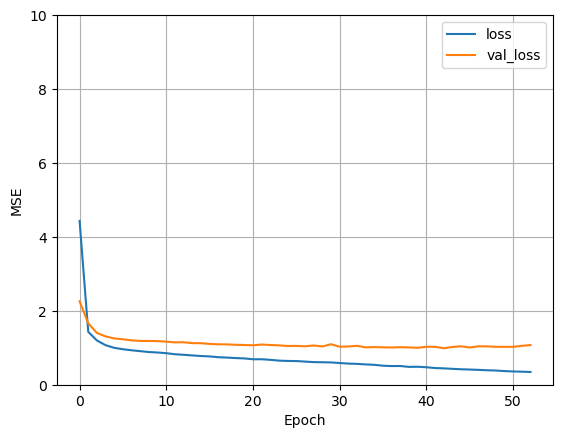

In [53]:
plot_loss(history)

In [54]:
y_pred_mlp_1 = mlp_1.predict(x_test)

9/9 [==============================] - 0s 2ms/step


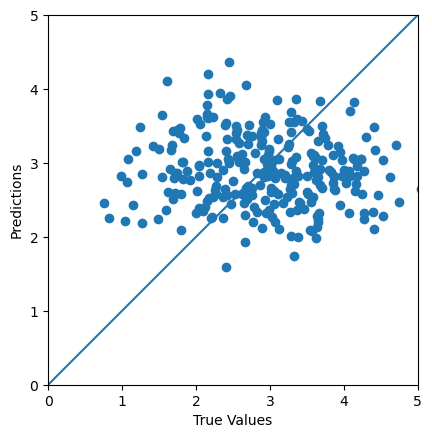

In [55]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_mlp_1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


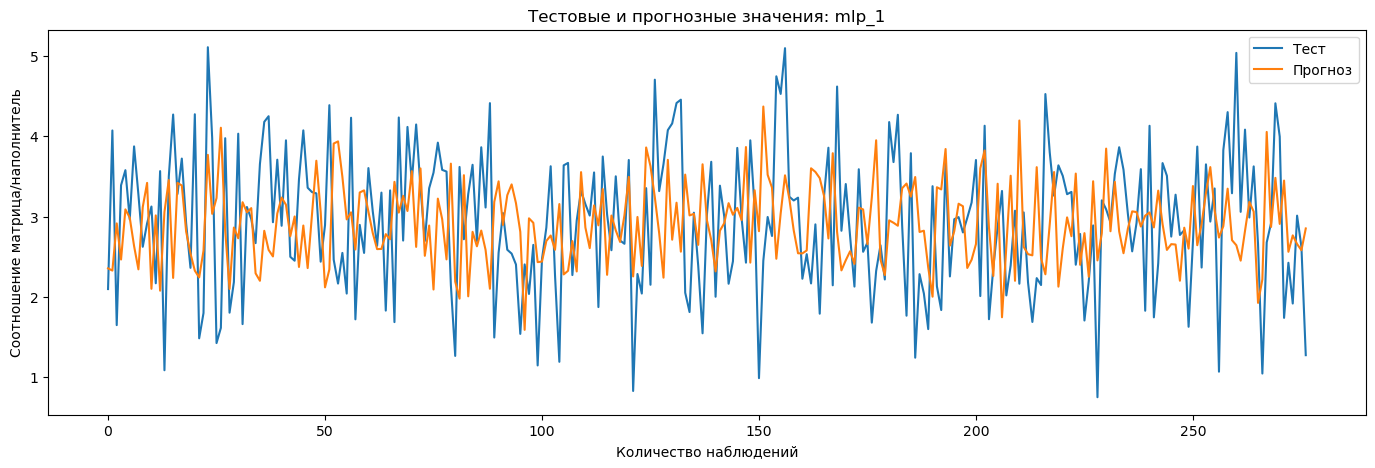

In [56]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_1')

In [57]:
df_mlp_1 = error(mlp_1, x_train, x_test, y_train, y_test,
    name = 'mlp_1', trg = 'Соотношение матрица-наполнитель')
df_mlp_1

9/9 [==============================] - 0s 813us/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_1,Соотношение матрица-наполнитель,0.840353,0.578847,1.038615,0.536648,-0.358628


# Увеличим число слоев и изменим число нейронов

In [58]:
def build_and_compile_model(normalizer):
    model_2 = keras.Sequential([
      normalizer,
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),  
      layers.Dense(1)
    ])

    model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_2

In [59]:
mlp_2 = build_and_compile_model(normalizer)
mlp_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_7 (Dense)             (None, 32)                416       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,002
Trainable params: 10,977
Non-trainable params: 25
_________________________________________________

In [60]:
%%time
history = mlp_2.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 9ms/step - loss: 5.5952 - val_loss: 1.9818
Epoch 2/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.4481 - val_loss: 1.3975
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1492 - val_loss: 1.2575
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0081 - val_loss: 1.2099
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9574 - val_loss: 1.1852
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9149 - val_loss: 1.1612
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8896 - val_loss: 1.1623
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8510 - val_loss: 1.1416
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8143 - val_loss: 1.1271
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.7920 - val_loss: 1.1060

In [61]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

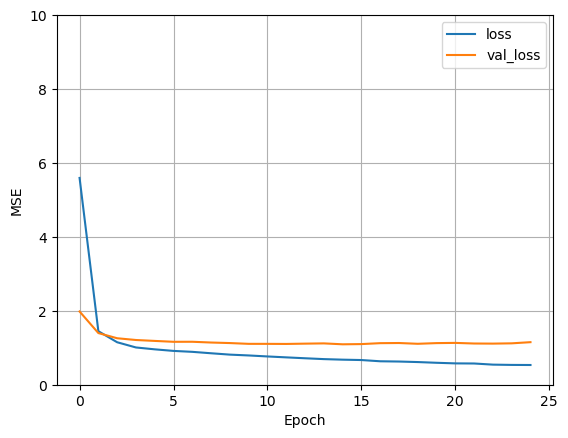

In [62]:
plot_loss(history)

In [63]:
y_pred_mlp_2 = mlp_2.predict(x_test)

9/9 [==============================] - 0s 2ms/step


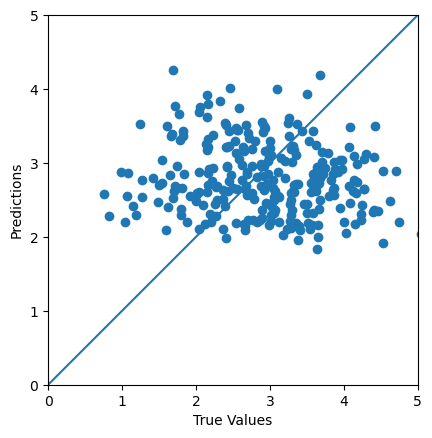

In [64]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_mlp_2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 0s/step


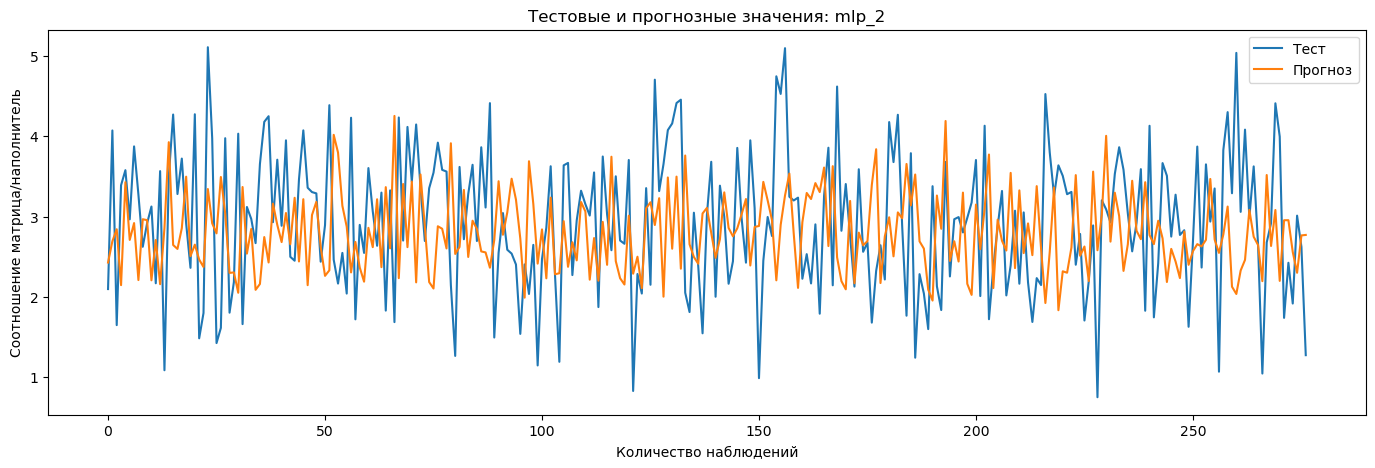

In [65]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_2.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_2')

In [66]:
df_mlp_2 = error(mlp_2, x_train, x_test, y_train, y_test,
    name = 'mlp_2', trg = 'Соотношение матрица-наполнитель')
df_mlp_2

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_2,Соотношение матрица-наполнитель,0.872412,0.692436,1.102808,0.751595,-0.4426


# число слоев оставим , изменим число нейронов

In [67]:
def build_and_compile_model(normalizer):
    model_3 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),  
      layers.Dense(1)
    ])

    model_3.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_3

In [68]:
mlp_3 = build_and_compile_model(normalizer)
mlp_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_11 (Dense)            (None, 64)                832       
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 42,458
Trainable params: 42,433
Non-trainable params: 25
_________________________________________________

In [69]:
%%time
history = mlp_3.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 9ms/step - loss: 2.9807 - val_loss: 1.8662
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.1392 - val_loss: 1.3275
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9903 - val_loss: 1.3091
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9325 - val_loss: 1.2828
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8951 - val_loss: 1.2514
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8560 - val_loss: 1.2273
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8124 - val_loss: 1.1942
Epoch 8/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7890 - val_loss: 1.1729
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.7553 - val_loss: 1.2071
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7389 - val_loss: 1.1361

In [70]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

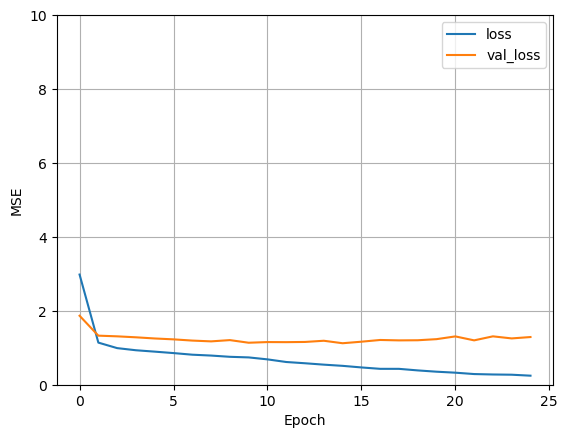

In [71]:
plot_loss(history)

In [72]:
y_pred_mlp_3 = mlp_3.predict(x_test)

9/9 [==============================] - 0s 0s/step


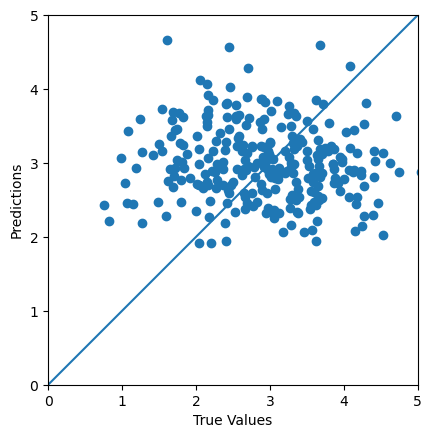

In [73]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_mlp_3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 0s/step


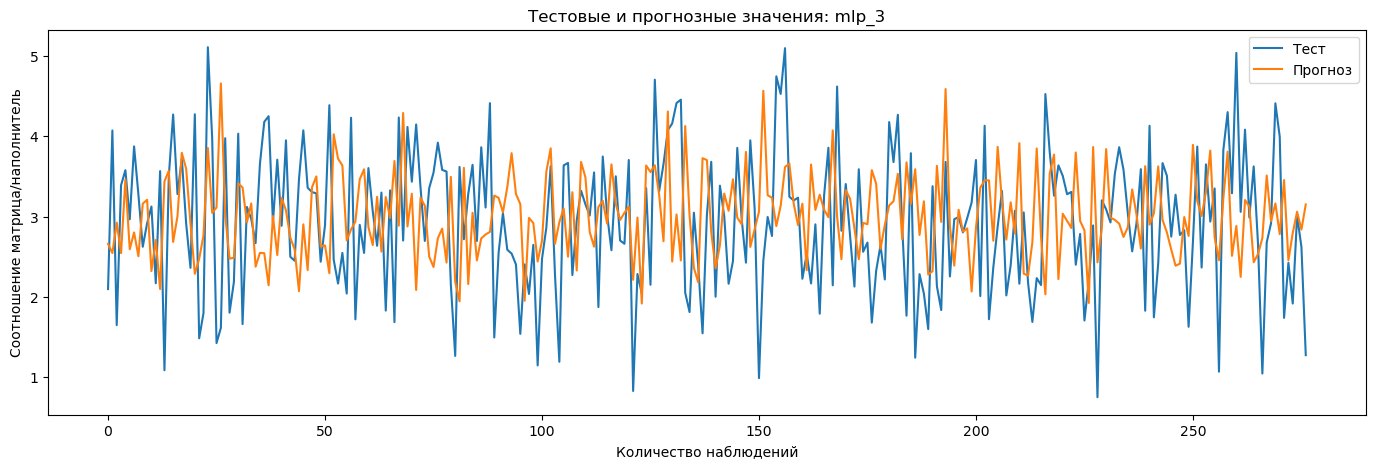

In [74]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_3.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_3')

In [75]:
df_mlp_3 = error(mlp_3, x_train, x_test, y_train, y_test,
    name = 'mlp_3', trg = 'Соотношение матрица-наполнитель')
df_mlp_3

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_3,Соотношение матрица-наполнитель,0.861566,0.596728,1.094448,0.590043,-0.431664


# Построим многослойную модель с теми же параметрами, но изменим оптимизатор на SGD

In [76]:
def build_and_compile_model(normalizer):
    model_4 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model_4.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='mean_squared_error')
    return model_4


In [77]:
mlp_4 = build_and_compile_model(normalizer)
mlp_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_15 (Dense)            (None, 64)                832       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [78]:
%%time
history = mlp_4.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 0s 8ms/step - loss: 8.0488 - val_loss: 6.2199
Epoch 2/1000
17/17 [==============================] - 0s 3ms/step - loss: 5.1793 - val_loss: 4.0593
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 3.3172 - val_loss: 2.6551
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 2.1641 - val_loss: 1.8833
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.5644 - val_loss: 1.4724
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.2618 - val_loss: 1.2768
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1242 - val_loss: 1.1857
Epoch 8/1000
17/17 [==============================] - 0s 2ms/step - loss: 1.0596 - val_loss: 1.1540
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.0347 - val_loss: 1.1273
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.0139 - val_loss: 1.1143

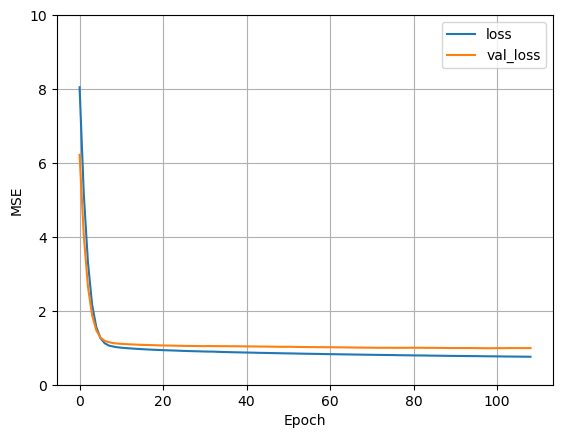

In [79]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)   

In [80]:
y_pred_mlp_4 = mlp_4.predict(x_test)



9/9 [==============================] - 0s 2ms/step


9/9 [==============================] - 0s 2ms/step


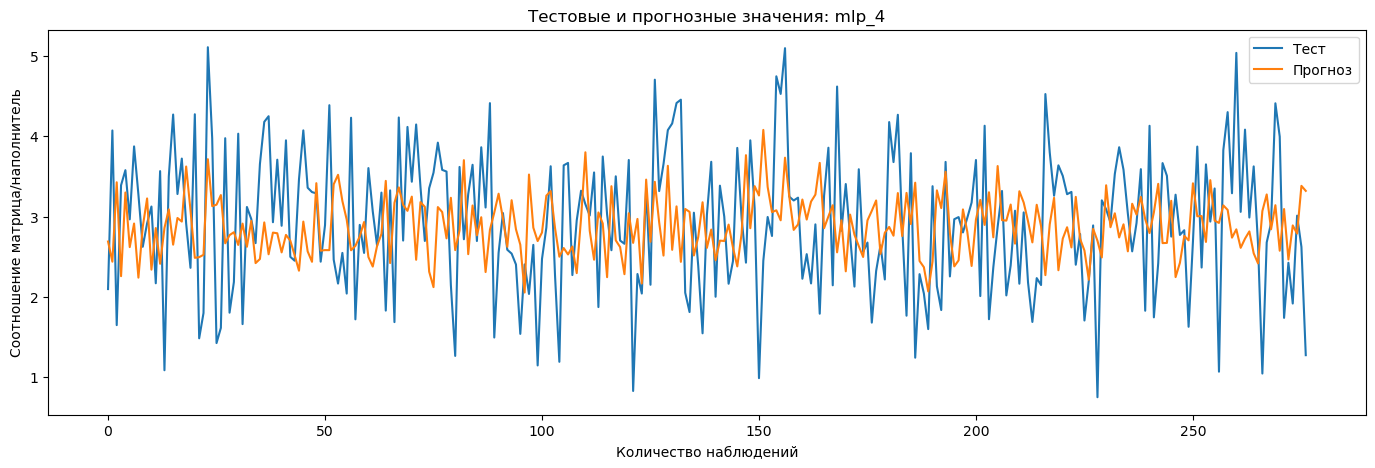

In [81]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_4.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_4')

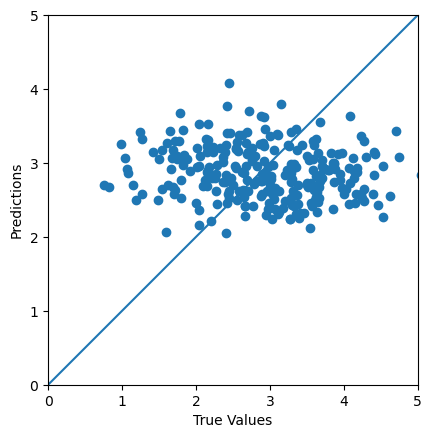

In [82]:
a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred_mlp_4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [83]:
df_mlp_4 = error(mlp_4, x_train, x_test, y_train, y_test,
    name = 'mlp_4', trg = 'Соотношение матрица-наполнитель')
df_mlp_4

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_4,Соотношение матрица-наполнитель,0.819054,0.721606,0.951622,0.810383,-0.244831


In [84]:
def build_and_compile_model(normalizer):
    model_5 = keras.Sequential([
      normalizer,
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),  
      layers.Dense(1)
    ])

    model_5.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='mean_squared_error')
    return model_5

In [85]:
mlp_5 = build_and_compile_model(normalizer)
mlp_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_18 (Dense)            (None, 32)                416       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,002
Trainable params: 10,977
Non-trainable params: 25
_________________________________________________

In [86]:
%%time
history = mlp_5.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 10ms/step - loss: 9.2370 - val_loss: 7.3119
Epoch 2/1000
17/17 [==============================] - 0s 3ms/step - loss: 5.9987 - val_loss: 4.7208
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 3.8236 - val_loss: 2.9604
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 2.3911 - val_loss: 2.0536
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.6861 - val_loss: 1.6385
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.3596 - val_loss: 1.4992
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.2392 - val_loss: 1.4577
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1893 - val_loss: 1.4321
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1578 - val_loss: 1.4154
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1357 - val_loss: 1.388

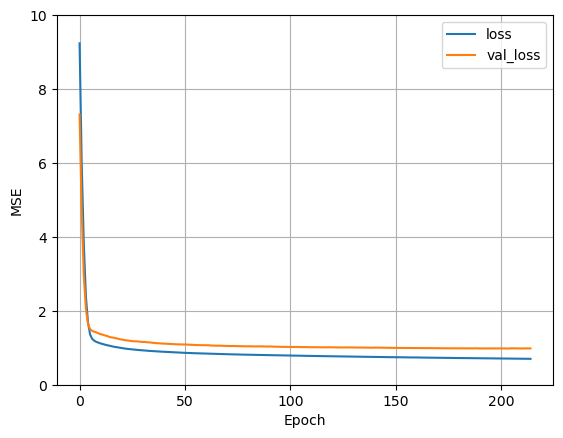

In [87]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [88]:
y_pred_mlp_5 = mlp_5.predict(x_test)

9/9 [==============================] - 0s 2ms/step


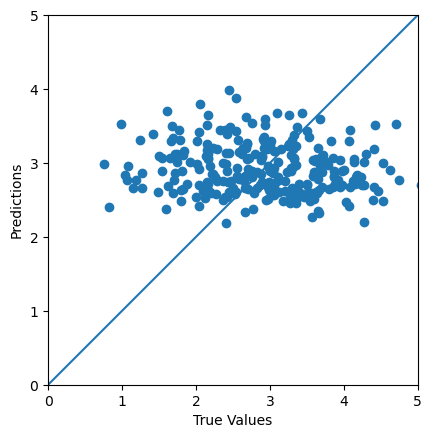

In [89]:
a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred_mlp_5 )
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 0s/step


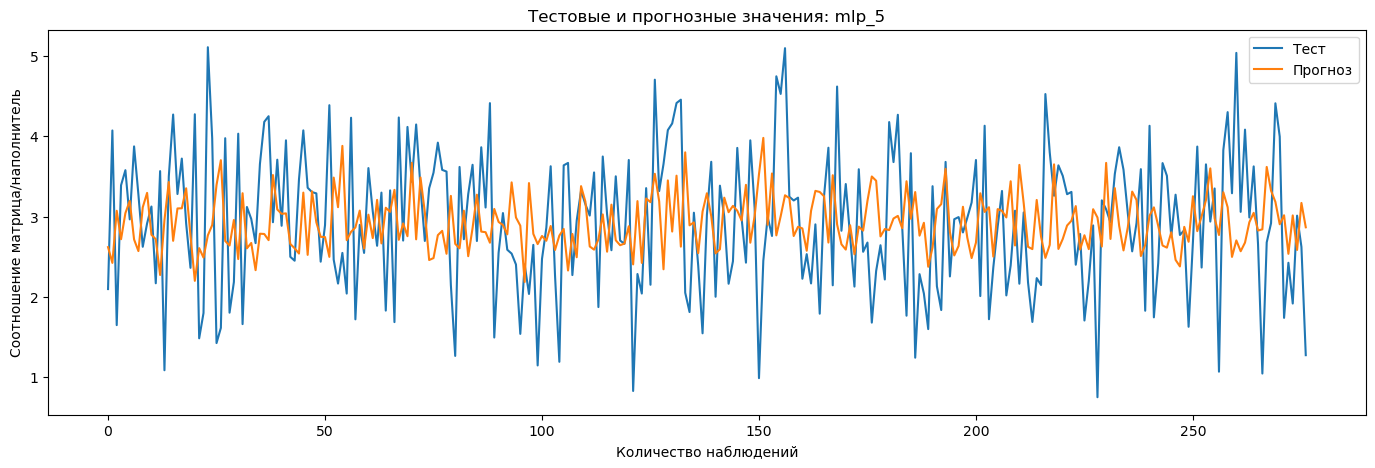

In [90]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_5.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_5')

In [91]:
df_mlp_5 = error(mlp_5, x_train, x_test, y_train, y_test,
    name = 'mlp_5', trg = 'Соотношение матрица-наполнитель')
df_mlp_5

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_5,Соотношение матрица-наполнитель,0.802717,0.696003,0.94825,0.759772,-0.240421


In [92]:
def build_and_compile_model(normalizer):
    model_6 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),  
      layers.Dense(1)
    ])

    model_6.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_6

In [93]:
mlp_6 = build_and_compile_model(normalizer)
mlp_6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_22 (Dense)            (None, 64)                832       
                                                                 
 dense_23 (Dense)            (None, 128)               8320      
                                                                 
 dense_24 (Dense)            (None, 256)               33024     
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 42,458
Trainable params: 42,433
Non-trainable params: 25
_________________________________________________

In [94]:
%%time
history = mlp_6.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 9ms/step - loss: 3.6699 - val_loss: 1.9893
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3475 - val_loss: 1.5212
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.1227 - val_loss: 1.2732
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9952 - val_loss: 1.2271
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9367 - val_loss: 1.1842
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8742 - val_loss: 1.1710
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8269 - val_loss: 1.1435
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.7760 - val_loss: 1.1212
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.7440 - val_loss: 1.0981
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6945 - val_loss: 1.1328

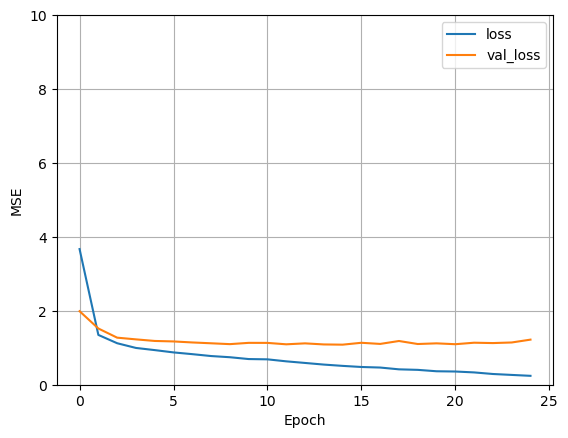

In [95]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [96]:
y_pred_mlp_6 = mlp_6.predict(x_test)

9/9 [==============================] - 0s 0s/step


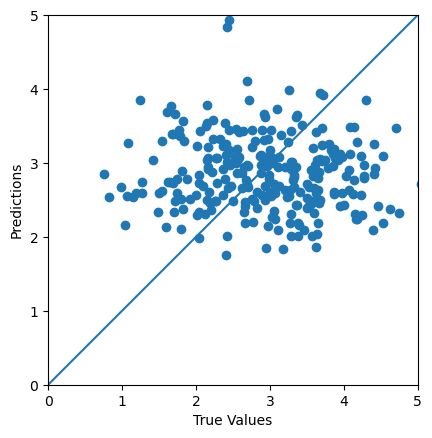

In [97]:
a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred_mlp_6  )
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


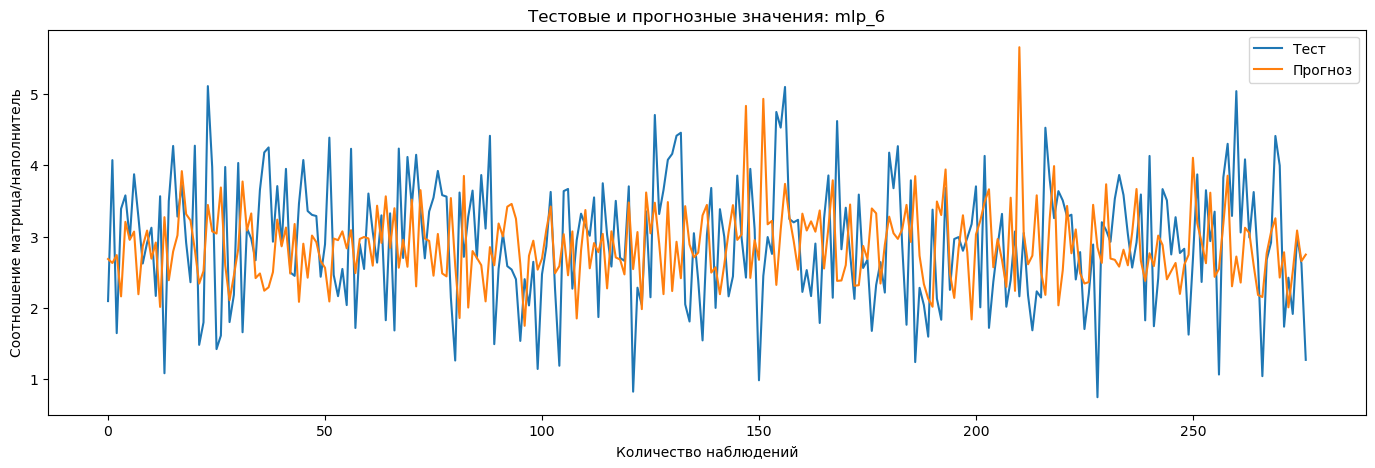

In [98]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_6.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_6')

In [99]:
df_mlp_6 = error(mlp_6, x_train, x_test, y_train, y_test,
    name = 'mlp_6', trg = 'Соотношение матрица-наполнитель')
df_mlp_6

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_6,Соотношение матрица-наполнитель,0.853899,0.606083,1.089066,0.594371,-0.424623


In [100]:
df_mlp_result = pd.concat([df_mlp_1, df_mlp_2, df_mlp_3, df_mlp_4, df_mlp_5, df_mlp_6, ], axis=0).reset_index(drop = True)
df_mlp_result

,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_1,Соотношение матрица-наполнитель,0.840353,0.578847,1.038615,0.536648,-0.358628
1,mlp_2,Соотношение матрица-наполнитель,0.872412,0.692436,1.102808,0.751595,-0.442600
2,mlp_3,Соотношение матрица-наполнитель,0.861566,0.596728,1.094448,0.590043,-0.431664
3,mlp_4,Соотношение матрица-наполнитель,0.819054,0.721606,0.951622,0.810383,-0.244831
4,mlp_5,Соотношение матрица-наполнитель,0.802717,0.696003,0.948250,0.759772,-0.240421
5,mlp_6,Соотношение матрица-наполнитель,0.853899,0.606083,1.089066,0.594371,-0.424623


# Добавим слой дропаут

In [101]:
def build_and_compile_model(normalizer):
    model_7 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(1)
    ])

    model_7.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_7

In [102]:
mlp_7 = build_and_compile_model(normalizer)
mlp_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_26 (Dense)            (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                     

In [103]:
%%time
history = mlp_7.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 10ms/step - loss: 3.8675 - val_loss: 1.8522
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3343 - val_loss: 1.3255
Epoch 3/1000
17/17 [==============================] - 0s 5ms/step - loss: 1.1169 - val_loss: 1.2280
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0407 - val_loss: 1.2226
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0162 - val_loss: 1.1962
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0037 - val_loss: 1.1745
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9508 - val_loss: 1.1591
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9830 - val_loss: 1.2027
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9352 - val_loss: 1.1401
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9049 - val_loss: 1.136

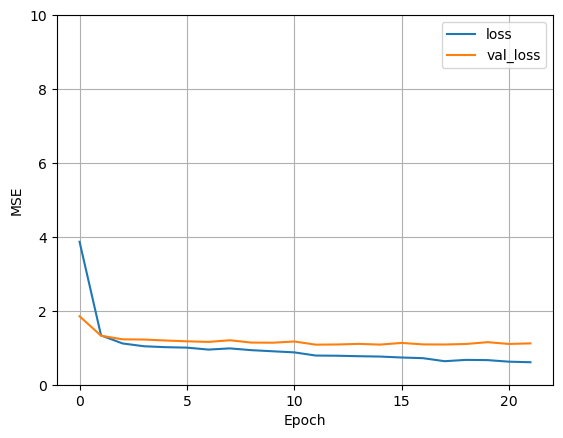

In [104]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [105]:
y_pred_mlp_7 = mlp_7.predict(x_test)

9/9 [==============================] - 0s 2ms/step


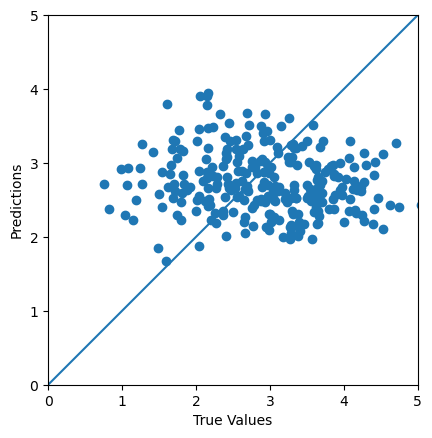

In [106]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_mlp_7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


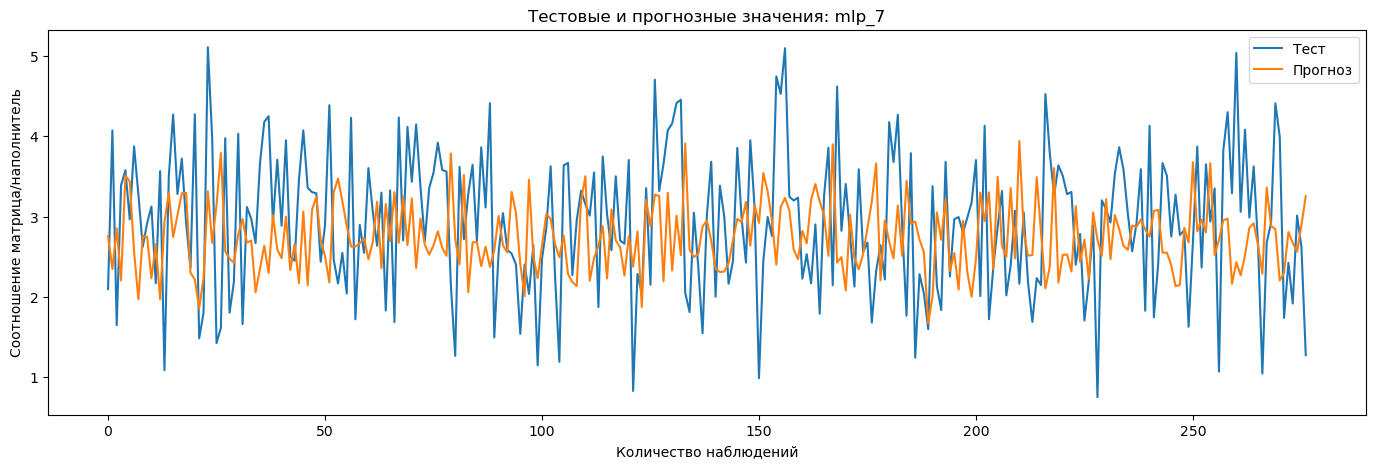

In [107]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_7.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_7')

In [108]:
df_mlp_7 = error(mlp_7, x_train, x_test, y_train, y_test,
    name = 'mlp_7', trg = 'Соотношение матрица-наполнитель')
df_mlp_7

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_7,Соотношение матрица-наполнитель,0.854835,0.716314,1.058537,0.808886,-0.384689


In [109]:
df_END = pd.concat([df_result, df_mlp_result, df_mlp_7], axis=0).reset_index(drop = True)
df_END

,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_1,Соотношение матрица-наполнитель,0.726626,0.741019,0.799486,0.855903,-0.045820
1,model_2,Соотношение матрица-наполнитель,0.739409,0.730533,0.821657,0.839050,-0.074823
2,model_3,Соотношение матрица-наполнитель,0.736534,0.761226,0.833415,0.891890,-0.090203
3,model_4,Соотношение матрица-наполнитель,0.728231,0.720052,0.801538,0.813380,-0.048504
4,mlp_1,Соотношение матрица-наполнитель,0.840353,0.578847,1.038615,0.536648,-0.358628
5,mlp_2,Соотношение матрица-наполнитель,0.872412,0.692436,1.102808,0.751595,-0.442600
6,mlp_3,Соотношение матрица-наполнитель,0.861566,0.596728,1.094448,0.590043,-0.431664
7,mlp_4,Соотношение матрица-наполнитель,0.819054,0.721606,0.951622,0.810383,-0.244831
8,mlp_5,Соотношение матрица-наполнитель,0.802717,0.696003,0.948250,0.759772,-0.240421
9,mlp_6,Соотношение матрица-наполнитель,0.853899,0.606083,1.089066,0.594371,-0.424623


# Метод GridSearchCV для нейросети

In [110]:
def create_model_GSCV(lyrs=[32], act='softmax', optimizer='adam', dr=0.1):
    
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model_GSCV = Sequential()
    model_GSCV.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model_GSCV.add(Dense(lyrs[i], activation=act))
    
    model_GSCV.add(Dropout(dr))
    model_GSCV.add(Dense(1))  # выходной слой
    
    model_GSCV.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
 
    return model_GSCV

# Ищем оптимальное число epochs и размер batch_size

In [111]:
model_GSCV= KerasRegressor(build_fn=create_model_GSCV, verbose=0)

batch_size = [10, 20, 30, 40, 50]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model_GSCV, param_grid=param_grid, n_jobs=1,cv=10)
grid_result = grid.fit(x_train, y_train)

#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.821667 using {'batch_size': 10, 'epochs': 100}
-3.526164 (0.623258) with: {'batch_size': 10, 'epochs': 10}
-0.838339 (0.080663) with: {'batch_size': 10, 'epochs': 50}
-0.821667 (0.063953) with: {'batch_size': 10, 'epochs': 100}
-5.492464 (0.897401) with: {'batch_size': 20, 'epochs': 10}
-1.184630 (0.208486) with: {'batch_size': 20, 'epochs': 50}
-0.830044 (0.066383) with: {'batch_size': 20, 'epochs': 100}
-6.262323 (0.751063) with: {'batch_size': 30, 'epochs': 10}
-2.051579 (0.304215) with: {'batch_size': 30, 'epochs': 50}
-0.938100 (0.105744) with: {'batch_size': 30, 'epochs': 100}
-6.591974 (0.915940) with: {'batch_size': 40, 'epochs': 10}
-2.808561 (0.561820) with: {'batch_size': 40, 'epochs': 50}
-1.225287 (0.235978) with: {'batch_size': 40, 'epochs': 100}
-7.161272 (0.817040) with: {'batch_size': 50, 'epochs': 10}
-3.325716 (0.444497) with: {'batch_size': 50, 'epochs': 50}
-1.672839 (0.319932) with: {'batch_size': 50, 'epochs': 100}


# Ищем optimizer

In [112]:
model_GSCV = KerasRegressor(build_fn=create_model_GSCV, epochs=100, batch_size=10, verbose=0)

optimizer = ['SGD', 'RMSprop',  'Adam', ]
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model_GSCV, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ......................................optimizer=SGD; total time=   5.9s
[CV] END ......................................optimizer=SGD; total time=   6.0s
[CV] END ......................................optimizer=SGD; total time=   6.0s
[CV] END ......................................optimizer=SGD; total time=   6.1s
[CV] END ......................................optimizer=SGD; total time=   6.0s
[CV] END ......................................optimizer=SGD; total time=   6.3s
[CV] END ......................................optimizer=SGD; total time=   6.5s
[CV] END ......................................optimizer=SGD; total time=   6.4s
[CV] END ......................................optimizer=SGD; total time=   6.4s
[CV] END ......................................optimizer=SGD; total time=   6.6s
[CV] END ..................................optimizer=RMSprop; total time=   6.1s
[CV] END ..................................optim

In [113]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.820892 using {'optimizer': 'RMSprop'}
-0.822423 (0.064011) with: {'optimizer': 'SGD'}
-0.820892 (0.064019) with: {'optimizer': 'RMSprop'}
-0.823023 (0.064071) with: {'optimizer': 'Adam'}


# Ищем колличество слоев

In [114]:
model_GSCV = KerasRegressor(build_fn=create_model_GSCV, epochs=100, batch_size=10, verbose=0)

layers = [[64, 64], [32, 64, 128], [64, 128, 256]]
param_grid = dict(lyrs=layers)

grid = GridSearchCV(estimator=model_GSCV, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ......................................lyrs=[64, 64]; total time=   6.8s
[CV] END ......................................lyrs=[64, 64]; total time=   6.7s
[CV] END ......................................lyrs=[64, 64]; total time=   6.8s
[CV] END ......................................lyrs=[64, 64]; total time=   7.0s
[CV] END ......................................lyrs=[64, 64]; total time=   6.7s
[CV] END ......................................lyrs=[64, 64]; total time=   7.3s
[CV] END ......................................lyrs=[64, 64]; total time=   7.6s
[CV] END ......................................lyrs=[64, 64]; total time=   7.5s
[CV] END ......................................lyrs=[64, 64]; total time=   7.3s
[CV] END ......................................lyrs=[64, 64]; total time=   7.5s
[CV] END .................................lyrs=[32, 64, 128]; total time=   7.7s
[CV] END .................................lyrs=[

In [115]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.817732 using {'lyrs': [64, 64]}
-0.817732 (0.061841) with: {'lyrs': [64, 64]}
-0.817784 (0.061877) with: {'lyrs': [32, 64, 128]}
-0.817768 (0.061537) with: {'lyrs': [64, 128, 256]}


# Ищем оптимальные параметры для слоев Dropout

In [116]:
model_GSCV =  KerasRegressor(build_fn=create_model_GSCV, epochs=100, batch_size=10, verbose=0)

drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)

grid = GridSearchCV(estimator=model_GSCV, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END .............................................dr=0.0; total time=   6.1s
[CV] END .............................................dr=0.0; total time=   6.4s
[CV] END .............................................dr=0.0; total time=   5.9s
[CV] END .............................................dr=0.0; total time=   6.0s
[CV] END .............................................dr=0.0; total time=   6.0s
[CV] END .............................................dr=0.0; total time=   6.2s
[CV] END .............................................dr=0.0; total time=   6.4s
[CV] END .............................................dr=0.0; total time=   6.2s
[CV] END .............................................dr=0.0; total time=   6.3s
[CV] END .............................................dr=0.0; total time=   6.2s
[CV] END ............................................dr=0.01; total time=   6.0s
[CV] END .......................................

In [117]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.817680 using {'dr': 0.0}
-0.817680 (0.061698) with: {'dr': 0.0}
-0.820165 (0.063026) with: {'dr': 0.01}
-0.820588 (0.062374) with: {'dr': 0.05}
-0.821465 (0.062367) with: {'dr': 0.1}
-0.829961 (0.068317) with: {'dr': 0.2}
-0.825275 (0.064630) with: {'dr': 0.3}
-0.820728 (0.063567) with: {'dr': 0.5}


In [134]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout

In [129]:
def build_and_compile_model(normalizer):
    model_8 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(1)
    ])

    model_8.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_8

In [130]:
mlp_8 = build_and_compile_model(normalizer)
mlp_8.summary()

Model: "sequential_295"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_649 (Dense)           (None, 64)                832       
                                                                 
 dropout_287 (Dropout)       (None, 64)                0         
                                                                 
 dense_650 (Dense)           (None, 128)               8320      
                                                                 
 dropout_288 (Dropout)       (None, 128)               0         
                                                                 
 dense_651 (Dense)           (None, 256)               33024     
                                                    

In [131]:
%%time
history = mlp_8.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 22ms/step - loss: 3.1223 - val_loss: 1.4715
Epoch 2/1000
17/17 [==============================] - 0s 5ms/step - loss: 1.2257 - val_loss: 1.2548
Epoch 3/1000
17/17 [==============================] - 0s 5ms/step - loss: 1.1201 - val_loss: 1.2242
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0478 - val_loss: 1.1639
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9898 - val_loss: 1.1277
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9772 - val_loss: 1.2161
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9127 - val_loss: 1.1635
Epoch 8/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.9495 - val_loss: 1.1087
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9363 - val_loss: 1.0964
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8075 - val_loss: 1.106

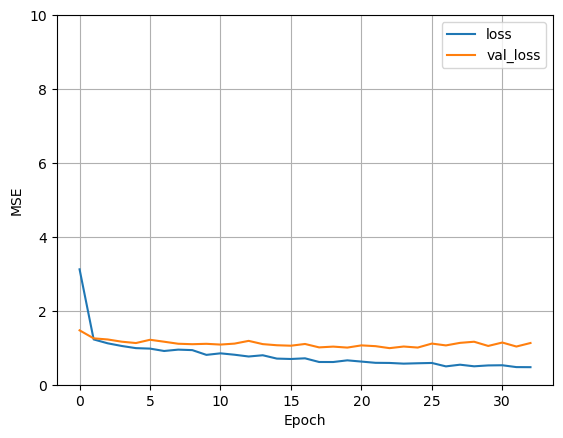

In [132]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [136]:
mlp_8.evaluate(x_test, y_test)

9/9 [==============================] - 0s 0s/step - loss: 1.0260


1.0260441303253174

In [138]:
mlp_8.save('App/mlp_8/NEIRO_1')

INFO:tensorflow:Assets written to: App/mlp_8/NEIRO_1\assets


INFO:tensorflow:Assets written to: App/mlp_8/NEIRO_1\assets


In [140]:
mlp_8_loaded = keras.models.load_model('App/mlp_8/NEIRO_1')

In [141]:
mlp_8_loaded.evaluate(x_test, y_test)

9/9 [==============================] - 3s 3ms/step - loss: 1.0260


1.0260441303253174

In [142]:
print(tf.__version__)

2.11.0
